# Law Of Large Numbers

This short notebook is about the most fundamental concept of inferential statistics: the Law Of Large Numbers. It says that the sample mean $\bar{x}$ converges to the population mean $\mu$ as the sample size $n$ increases.

In [38]:
# Import packages
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

I write a helper function to illustrate the law of large numbers for different populations.

In [61]:
def plot_sample_means(population_mean, population_stdev, sample_size_ls, ci=.95):
    """Plots sample mean and confidence interval for specified sample sizes"""
    sample_means = []
    sample_stdevs = []
    for sample_size in sample_size_ls:
        sample = np.random.normal(population_mean, population_stdev, sample_size)
        sample_means.append(np.mean(sample))
        sample_stdevs.append(np.std(sample, ddof=1))

    z = stats.norm.ppf(1-ci)/2 * (-1)
    ci95_lb = np.array(sample_means) - 1.96 * np.array(sample_stdevs) / np.sqrt(sample_size_ls)
    ci95_ub = np.array(sample_means) + 1.96 * np.array(sample_stdevs) / np.sqrt(sample_size_ls)

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.set_title("Sample Mean")
    ax.fill_between(sample_size_ls, ci95_lb, ci95_ub, color='red', alpha=0.1)
    ax.plot(sample_size_ls, sample_means)
    ax.set_xlabel("n")
    ax.set_ylabel("Sample Mean")
    plt.show()

Here it is. We can clearly see that the sample mean $\bar{x}$ converges to $\mu = 100$ for large choices of $n$.

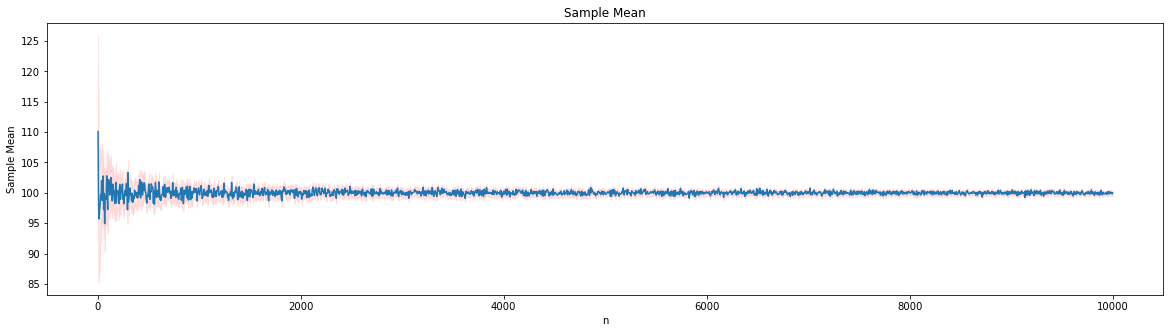

In [67]:
plot_sample_means(100, 20, np.arange(5, 10000, 5), ci=.99)